# Reflectancia difusa para detección de cáncer bucal

## Introducción

La espectroscopía de reflectancia difusa permite obtener información relevante de muestras biológicas de forma no invasiva. La idea básica se muestra en la Fig.1. Se envía un haz de luz de cierto contenido espectral, por ejemplo, luz blanca, y se analiza la luz retrodifundida por el tejido. 

![ref dif](fig1refdifhigado.png)


Se obtiene así un espectro de reflectancia $R(\lambda)=I_R(\lambda)/I_0(\lambda)$, donde $I_0(\lambda)$ e $I_R(\lambda)$ representan la intensidad incidente y reflejada difusa, respectivamente. Nos referimos a esta reflectancia como reflectancia difusa debido a que la luz o radiación que emerge del tejido ha experimentado muchos eventos de absorción y scattering por las moléculas y estructuras celulares que constituyen el mismo. En su camino cada componente de haz incidente se desviará de su trayectoria y será parcial o totalmente absorbido. Los cambios experimentados por las diferentes componentes espectrales de la luz incidente llevarán información del tipo y de la concentración de moléculas en el tejido y de los tamaños de las estructuras que lo componen.
El montaje típico se muestra en la figura: una fuente de luz blanca ilumina un mazo de fibras  compuesta de una fibra centrar que transporta la radiación hasta el tejido,

![ref dif 1](fig1refdiforal.png)

La reflectancia difusa de  un tejido contiene información sobre la variación bioquímica y estructural que ocurre en un tejido cuando progresa  u proceso patológico como por ejemplo el cáncer. Por ello se puede emplear en el diagnóstico de diferentes enfermedades incluyendo el cáncer de mama [3–5], cáncer cervical [6], cáncer oral [7–9], cáncer de colon  [10], cáncer de piel [11], cáncer de hígado[13],  cáncer de próstata  [14],  esófago de Barret [15], entre otras.

GESTIONAR REFERENCIAS

Es preciso notar que el tejido experimenta cambios bioquímicos y morfológicos debido a las alteraciones metabólicas, genómicas y proteómicas de las células cancerosas. Durante la transformación de normal a canceroso aparecen cambios tales como angiogénesis, variación en el nivel de oxígeno en sangre, aumento en el tamaño de los núcleos y de la ratio nucleo/citoplasma o aumento del número de mitocondrias que afectan a las propiedades ópticas del tejido. Estos cambios pueden ser aprovechados para discriminar entre tejido normal y canceroso.
La extracción de las propiedades ópticas del tejido se puede llevar a cabo mediante procedimientos de ajuste de modelos teóricos analíticos  (ecuación de difusión, y modelo de  Kubelka Munk) y métodos numéricos tales como métodos inversos de  Monte Carlo. 

![ref dif 3](fig3refdifhigado.png)



##  Modelo de absorción, scattering y reflectancia para la cavidad oral

Vamos a aplicar el esquema anterior al caso de  una medida de reflectancia difusa de la piel. Se asume que las sustancias absorbentes relevantes en el epitelio bucal son la sangre, con una fración en volumen **fs**, la melanina con  una fracción **fMel**,  una fracción de deoxihemoglobina en la forma de methemoglobina (**G**), y   una concentración de caroteno **Ccar**. A su vez, la sangre se compone de oxihemoglobina y deoxihemoglobina, con una fraccion de oxigeno en sangre dada por **S**. 

El siguiente programa muestra los coeficientes de absorción lineal de la hemoglobina, oxihemoglobina y methemoglobina para su comparación.

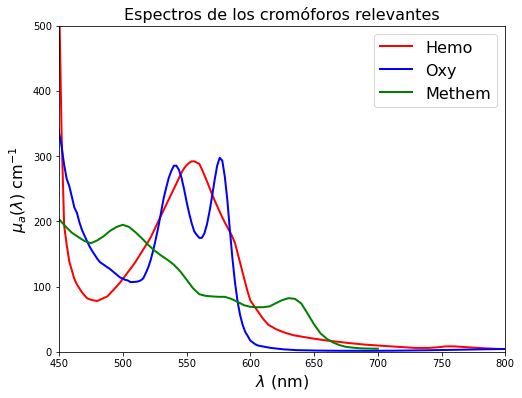

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#--------------------------------------------------------------------------#
# CARGA LOS ESPECTROS DE ARCHIVO DE SANGRE                           # 
#--------------------------------------------------------------------------#
A=np.loadtxt('epsilon_Hemo.dat')            #Sangre (oxy, deoxy)
landas_sangre = A[:,0]                 #carga las longitudes de onda en nm
muadeoxySG = np.log(10)*A[:,1]*150/64500  #espectro de la Dexoxihemoglobina

B=np.loadtxt('epsilon_Oxy.dat')                   #Sangre (oxy, deoxy)
muaoxySG = np.log(10)*B[:,1]*150/64500  #espectro de la Dexoxihemoglobina

M=np.loadtxt('mua_Methemo.dat')
landaM=M[:,0]
muaMet_0=M[:,1]
muamel_0 = 6.6e11*landas_sangre**(-3.33)
#--------------------------------------------------------------------------------------------#--
fig = plt.figure(figsize=(8,6))
plt.plot(landas_sangre, muadeoxySG , 'r',linewidth=2)
plt.plot(landas_sangre, muaoxySG , 'b',linewidth=2)
plt.plot(landaM, muaMet_0, 'g',linewidth=2)
plt.xlabel('$\lambda$ (nm)',fontsize=16)
plt.ylabel('$\mu_a(\lambda)$ cm$^{-1}$',fontsize=16)
plt.xlim(450,800)
plt.ylim(0,500)
plt.legend(('Hemo', 'Oxy', 'Methem'),fontsize=16)
plt.title('Espectros de los cromóforos relevantes', fontsize=16);

Puede apreciarse como la absorción de la methemoglobina domina en una región en torno a 500 nm y entre 600-650 nm respecto de los otros componentes de la sangre.

## 2.1 Coeficiente de absorción del epitelio de la cavidad oral

![ref dif oral 2](fig2refdiforal.png)

El coeficiente de absorción se puede expresar como, 

$$\mu_a(\lambda) = f_S S \mu_a^{ox}(\lambda) + f_S (1-S) \left[G \mu_a^{methhemo}(\lambda) + (1-G)\mu_a(\lambda)^{Hem}(\lambda) \right] + C_{car}\varepsilon_{m}^{car}(\lambda)ln(10)$$

El segundo término en la ecuación representa el hecho de que asumimos que la deoxihemoglobina se compone de hemoglobina (1-G) y methemoglobina(G). Si G=0, este modelo coincide con los habituales que solo consideran la presencia de hemoglobina y oxihemoglobina. 

## Coeficiente de scattering del epitelio bucal

En un tejido biológico existen una gran variedad de estructuras (núcleos celuares células, fibras de colágeno, estructuras  lipídicas...) cuyos tamaños varían desde los nm hasta las  10 o 20 micras. 

![fig1](figajustenolinealscattraymie_1.png)


Ello hace que debamos formular un modelo de scattering que incluya el scattering Rayleigh y el Mie:

$$\mu'_s(\lambda)= a \left[f_R \left(\frac{\lambda}{\lambda_0} \right)^{-4 }  +(1-f_R) \left(\frac{\lambda}{\lambda_0} \right)^{-b }\right]$$

En la figura adjunta se muestra un resumen del modelo de absorción, scattering y el modelo de reflectancia para el dispositivo que se emplea en la obtención del espectro de reflectancia.

QUE FIGURA ADJUNTA?. Quitar el párrafo si no va ah

## Esquema del procedimiento de ajuste no lineal

Una vez formulado el modelo de absorción y de scattring para el tejido en cuestión, debemos realizar un ajuste entre los datos de la reflectancia experimental y la reflectancia que suministra enl modelo teórico, a partir de unos valores semilla que incorporaremos al programa para que se inicie la compración.

FIGURA

### Algoritmo de inversion 

Los parámetros libres del modelo de tejido de higado, se pueden obtener mediante un ajuste inverso.  El diagrama de flujo del programa se muestra en la figura de arriba. Los pasos para realizar el programa son:

* Paso 1: Se introducen unos valores iniciales para los parámeros desconocidos , **fRay**,**b**, **fs**, **S**, **G**, **fMel**, y **Ccar**.

* Paso 2: Se cargan los espectros de absorción de los componentes y se calcula el coeficiente de absorción del tejido y el coeficiente de scattering a partir de las ecuaciones  de más arriba.

* Paso 3: Se lleva a cabo una búsqueda del mínimo de la funcion error entre el modelo teórico y la reflectancia experimental. Esta minimización puede realizarse con el función *fmin* de Python .De este ajuste, se optienen los parámetros del tejido.



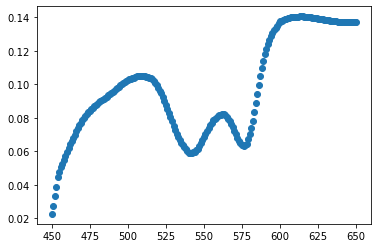

In [2]:
# Carga el np.expectro de reflectancia np.experimental
EE=np.loadtxt('Sano2.dat') 
landas_exp = EE[:,0]
Rpiel_exper = EE[:,1]

plt.plot(landas_exp, Rpiel_exper,'o')

Optimization terminated successfully.
         Current function value: 0.000688
         Iterations: 1465
         Function evaluations: 2161


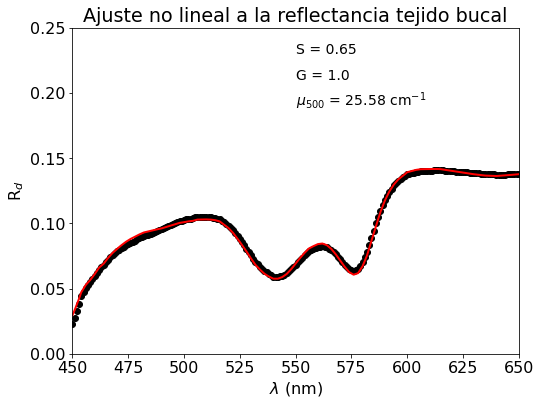

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', size=16)
def funcionerror_oralqq(valores_ini, landas_exp,  Rpiel_exper, landas_sangre, muaoxySG, muadeoxySG, landaC, epsilonCar_0,landaM, muaMet_0, muamel_0):
    
    fs= valores_ini[0]
    S= valores_ini[1]
    Mel= valores_ini[2]
    mu500= valores_ini[3]
    fR= valores_ini[4]
    b= valores_ini[5]
    R0= valores_ini[6]
    C_car=valores_ini[7]
    G=valores_ini[8]

    ###########################################################################
    # MODELO DE ABSORCION DE LA HEMOGLOBINA, OXIHEMOGLOBINA, AGUA Y MELANINA  #
    ###########################################################################

    #ESPECTROS INTERPOLADOS A 'landas_exp'
    muaoxy = np.interp(landas_exp,landas_sangre, muaoxySG)
    muadeoxy = np.interp(landas_exp,landas_sangre, muadeoxySG)
    muaMet = np.interp(landas_exp,landaM, muaMet_0)
    epsilonCar = np.interp( landas_exp,landaC,epsilonCar_0)
    muamel = np.interp(landas_exp,landas_sangre, muamel_0)
    muCar=epsilonCar*C_car*np.log(10)


    #COEFICIENTE DE SCATTERING MIE+RAYLEIGH
    musp = mu500*(fR*1/(landas_exp/500)**4+ (1-fR)*1/(landas_exp/500)**b)

    # COEFICIENTE DE ABSORCIÓN TOTAL: Agua+Melanina+Sangre
    muadeoxyT=(1-G)*muadeoxy+ G*muaMet
    mua  = fs*(S*muaoxy + (1-S)*muadeoxyT) + Mel*muamel+ muCar # 'fs'  'S' y 'fa' son parámetros libres 

    #--------Modelo de reflectancia teorica
    #ri = 0.668 + 0.0636*n + 0.710/n - 1.440/n^2
    #A = (1 + ri)/(1 - ri)
    r = 0.04  # separación entre las fibras
    A=1
    zo = 1/(mua + musp)
    D = zo/3
    delta = np.sqrt(D/mua)
    r1 = np.sqrt(zo**2 + r**2)
    r2 = np.sqrt((zo + 4*A*D)**2 + r**2)
    mueff = 1/delta

    c = zo*(mueff + 1/r1)*np.exp(-r1/delta)/(r1**2)
    d = (zo + 4*A*D)*(mueff + 1/r2)*np.exp(-r2/delta)/(r2**2)
    Rdifusa_teorica = R0*( c + d )/(4*np.pi)



    ###################################################
    #Definición de la función error
    ######################################################
    err = np.sum( (Rdifusa_teorica - Rpiel_exper)**2 )  # funcion error que se quiere minimizar en todo el intervalo espectral


    #----- Condiciones para el ajuste:------------------------
    # Se pueden añadir constricciones impuestas a los posibles valores de las constantes
    #------------------------------------------------------------
    if Mel<0:
        err = err*10 # rebaja las exigencias de precesión al dar una locura (S>1 no puede ser)
    if S>1: 
        err = err*10 # rebaja las exigencias de precesión al dar una locura (S>1 no puede ser)
    if S<0.0:
        err = err*10 
    if G>1:
        err = err*10 # rebaja las exigencias de precesión al dar una locura (S>1 no puede ser)
    if G<0.0:
        err = err*10 
    return err

# ######################################################################## 
# Ajuste de los espectros experimentales de reflectancia difusa 
# a un modelo descrito en la función funcionerror_oral
#--------------------------------------------------------------------------
# ######################################################################## 
# 
#--------------------------------------------------------------------------

# Carga el np.expectro de reflectancia np.experimental
EE=np.loadtxt('Sano2.dat') 
landas_exp = EE[:,0]
Rpiel_exper = EE[:,1]
#figure
#plot(landas_np.exp, Rpiel_np.exper,'o')
#axis([450 650 0 0.3])
  
#--------------------------------------------------------------------------#
# CARGA LOS ESPECTROS DE ARCHIVO DE SANGRE Y AGUA                          # 
#--------------------------------------------------------------------------#
A=np.loadtxt('epsilon_Hemo.dat')             #Coeficiente de absorción molar de Hemo
landas_sangre = A[:,0]
muadeoxySG = np.log(10)*A[:,1]*150/64500  #Coeficiente de absorción lineal de Hemo

B=np.loadtxt('epsilon_Oxy.dat')              #Coeficiente de absorción molar de Oxyhemo
muaoxySG = np.log(10)*B[:,1]*150/64500    #Coeficiente de absorción lineal de Oxyhemo


M=np.loadtxt('mua_Methemo.dat')              #Coeficiente de absorción lineal de la methemoglobina
landaM=M[:,0]
muaMet_0=M[:,1]

C=np.loadtxt('epsilon_Caroteno.dat')         #Coeficiente de absorción molar del Caroteno
landaC=C[:,0]
epsilonCar_0=C[:,1]                    

muamel_0 = 6.6e11*landas_sangre**(-3.33) #Coeficiente de absorción lineal de la melanina

#----VALORES DE PARTIDA APROXIMADOS PARA REALIZAR EL AJUSTE------------------
    
fs =0.1
S=0.35
G = 0.6
Mel =0.002
R0= 0.017
C_car=3e-6
mu500=18.4
fR=0.2
b=1

valores_ini=[fs,S, Mel, mu500, fR, b, R0, C_car, G] #Estos valores son los valores semilla para que empiece el ajuste.
from scipy.optimize import fmin

result = fmin(funcionerror_oralqq, x0=valores_ini, args=(landas_exp, Rpiel_exper, landas_sangre, muaoxySG, muadeoxySG, landaC, epsilonCar_0,landaM,muaMet_0, muamel_0),maxiter=3000)
#---------------------------------------------------------------------------------------------------

#------------  Pintamos la  solucion-------------------------------------------------
fs= result[0]
S= result[1]
Mel= result[2]
mu500= result[3]
fR= result[4]
b= result[5]
R0= result[6]
C_car=result[7]
G= result[8]
   

#ESPECTROS INTERPOLADOS A 'landas_exp'
muaoxy = np.interp(landas_exp,landas_sangre, muaoxySG)
muadeoxy = np.interp(landas_exp,landas_sangre, muadeoxySG)
muaMet = np.interp(landas_exp,landaM, muaMet_0)
epsilonCar = np.interp( landas_exp,landaC,epsilonCar_0)
muamel = np.interp(landas_exp,landas_sangre, muamel_0)
muCar=epsilonCar*C_car*np.log(10)

#COEFICIENTE DE SCATTERING MIE+RAYLEIGH

musp = mu500*(fR*1/(landas_exp/500)**4+ (1-fR)*1/(landas_exp/500)**b)

# COEFICIENTE DE ABSORCIÓN TOTAL: Agua+Melanina+Sangre
muadeoxyT=(1-G)*muadeoxy+ G*muaMet
mua  = fs*(S*muaoxy + (1-S)*muadeoxyT) + Mel*muamel+ muCar # 'fs'  'S' y 'fa' son parámetros libres 

#--------Modelo de reflectancia teorica
r = 0.04  # separación entre las fibras
A=1
zo = 1/(mua + musp)
D = zo/3
delta = np.sqrt(D/mua)
r1 = np.sqrt(zo**2 + r**2)
r2 = np.sqrt((zo + 4*A*D)**2 + r**2)
mueff = 1/delta

c = zo*(mueff + 1/r1)*np.exp(-r1/delta)/(r1**2)
d = (zo + 4*A*D)*(mueff + 1/r2)*np.exp(-r2/delta)/(r2**2)
Rdifusa_teorica = R0*( c + d )/(4*np.pi)

#-----
fig = plt.figure(figsize=(8,6))
plt.plot(landas_exp, Rpiel_exper, 'ko')
plt.plot(landas_exp, Rdifusa_teorica, 'r-',linewidth=2)
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('R$_d$')
plt.title('Ajuste no lineal a la reflectancia tejido bucal')
plt.xlim(450,650)
plt.ylim(0,0.25)

x = 550
ymax = 0.25
dy = .02
sz=14

plt.text(x, ymax - 1*dy, 'S = '+ str(np.round(S,2)),fontsize=sz)
plt.text(x, ymax - 2*dy, 'G = '+ str(np.round(G)),fontsize=sz)
plt.text(x, ymax - 3*dy, '$\mu_{500}$ = '+ str(np.round(mu500,2)) +' cm$^{-1}$',fontsize=sz);


## Clasificación de tejidos 

Los parámetros estimados varian de un tejido a otro. Para hacernos una idea de las diferencias podemos calcular la media de todos ellos y comparar los valores entre tejido sano y tumoral. 
En la figura se muestran los resutados. En (a) se muestran dos espectros de cada tipo de tejido y en la (b) la distribución de los valores medios de los diferentes parámetros. Se puede apreciar que los parámetros a(mu500), S y G parecen ser los más significativos

![ref dif 3 oral](fig3refdiforal.png)

De la figura (b) se puede observar un aumento de la amplitud de scattering para el tejido cancerígeno  ($P < 0.002$,Wilcoxon rank-sum test), así como una disminución en la saturación de oxígeno, S ($P < 10^{−3}$)  y un aumento en la fracción de methemglobina ($P < 10^{−3}$).  La variation en a ($\mu_{500}$)  en el tejido normal y cancerígeno se puede atribuir al cambio en la estructura de los tejidos, dado que en el desarrollo del cáncer se acompaña con cambios morfológicos tales como angiogénesis, cambio en el tamaño de los núcleos, etc. Se puede observar  una disminución de la saturación de oxígeno en tejidos cancerosos en comparación con tejidos normales. Generalmente puede haber un exceso de contenido en sangre en los tejidos cancerígenos debido a la angiogénesis. El incremento de vasos sanguíneos  da lugar a un aumento del metabolismo  y por ello un mayor consumo de oxígeno  por las células cancerígenas: Esta puede ser la razón por la que S aumenta en tejidos cancerígenos.

Si ahora representamos a frente a S o a frente a G se  obtienen los siguientes gráficos (denominados scatter plots en inglés):

![ref dif 4 oral](fig4refdiforal.png)


Se puede observar que existe una variación significativa  entre los parámetros obtenidos para el tejido normal y canceroso. Los parámetros a, S y G son  estadísticamente significativos y se pueden usar para discriminar entre tejidos como puede desprenderse de las figuras (a) y (b). Si se usa un análisis discriminante usando los tres parámetros, se obtiene  una clara línea de división entre tejido normal y canceroso. 